In [1]:
import lightgbm as lgbm

In [2]:
from lightgbm import LGBMClassifier

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
dataset = load_breast_cancer()
cancer_df = pd.DataFrame(data=dataset.data,columns=dataset.feature_names)

In [4]:
cancer_df['target'] = dataset.target

In [5]:
X = cancer_df.iloc[:,:-1]
Y = cancer_df.iloc[:,-1]

In [6]:
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=156)

In [8]:
X_tr,X_val, y_tr,y_val = train_test_split(X_train,y_train,train_size=0.1,random_state=156)

In [9]:
lgbm = LGBMClassifier(n_estimators=400,learning_rate=0.05)

In [10]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.05,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 400,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [11]:
evals = [(X_tr,y_tr),(X_val,y_val)]
lgbm.fit(X_tr,y_tr,early_stopping_rounds=50,eval_metric='logloss',eval_set=evals,verbose=True)

[1]	training's binary_logloss: 0.608658	valid_1's binary_logloss: 0.649336
[2]	training's binary_logloss: 0.582588	valid_1's binary_logloss: 0.624646
[3]	training's binary_logloss: 0.558372	valid_1's binary_logloss: 0.603649
[4]	training's binary_logloss: 0.536032	valid_1's binary_logloss: 0.583252
[5]	training's binary_logloss: 0.515354	valid_1's binary_logloss: 0.565583
[6]	training's binary_logloss: 0.495819	valid_1's binary_logloss: 0.5481
[7]	training's binary_logloss: 0.477857	valid_1's binary_logloss: 0.53132
[8]	training's binary_logloss: 0.460833	valid_1's binary_logloss: 0.515235
[9]	training's binary_logloss: 0.430475	valid_1's binary_logloss: 0.49499
[10]	training's binary_logloss: 0.40276	valid_1's binary_logloss: 0.477103
[11]	training's binary_logloss: 0.377354	valid_1's binary_logloss: 0.461278
[12]	training's binary_logloss: 0.353981	valid_1's binary_logloss: 0.447275
[13]	training's binary_logloss: 0.332415	valid_1's binary_logloss: 0.434893
[14]	training's binary_log

C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\songkyu\anaconda3\envs\Python39_DA\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(learning_rate=0.05, n_estimators=400)

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
def get_clf_eval(y_test,pred=None,pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print('Precision: {:.4f}, Recall: {:.4f}, Accuracy: {:.4f}'.format(precision,recall,accuracy))
    print('F1-score: {:.4f}, ROC-AUC: {:.4f}'.format(f1,roc_auc))

In [13]:
preds = lgbm.predict(X_test)
pred_proba = lgbm.predict_proba(X_test)[:,1]

In [14]:
get_clf_eval(y_test,preds,pred_proba)

오차행렬
[[28  9]
 [ 4 73]]
Precision: 0.8902, Recall: 0.9481, Accuracy: 0.8860
F1-score: 0.9182, ROC-AUC: 0.9568


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

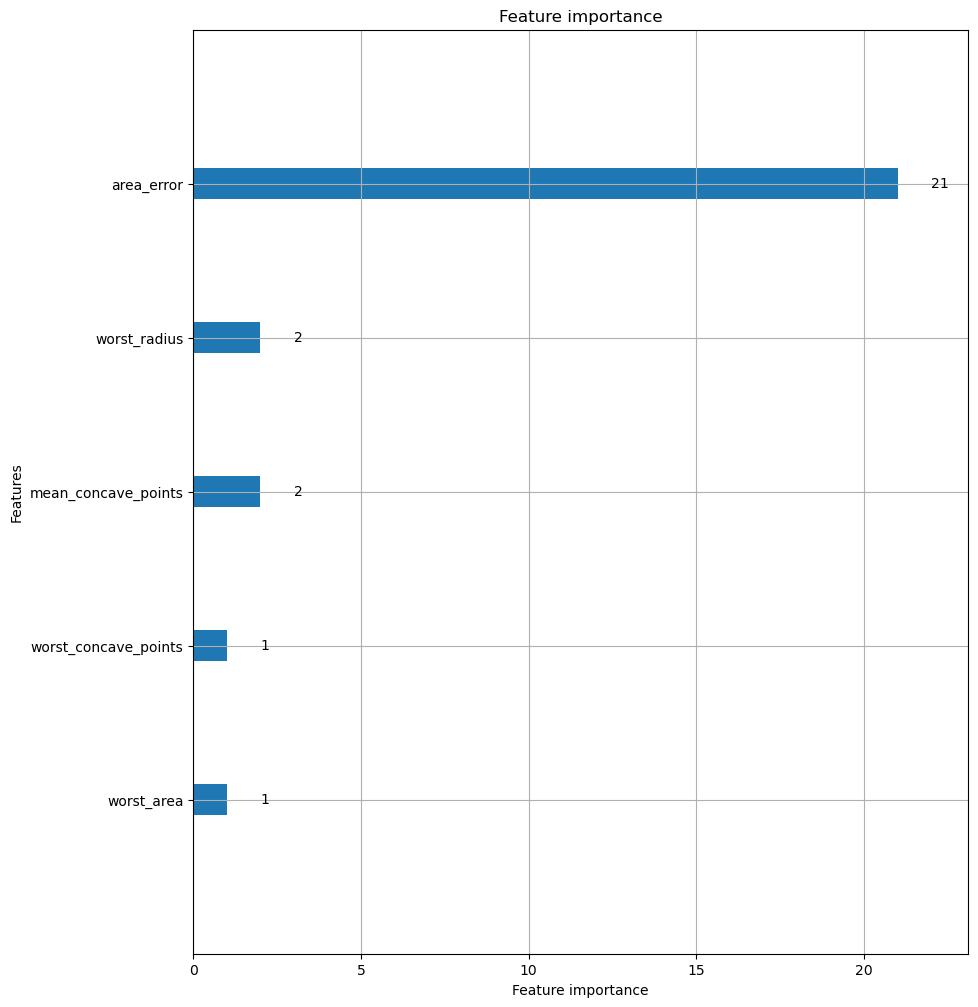

In [15]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm,ax=ax)

In [16]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.05,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 400,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [18]:
lgbm.feature_importances_

array([ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0, 21,  0,  0,  0,
        0,  0,  0,  2,  0,  0,  1,  0,  0,  0,  1,  0,  0])